In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

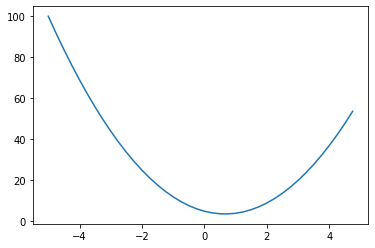

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
h = 0.000001           #small value to nudge for a derivative function
x = 2/3
print(f(x+h))
#slope = rise / run
print((f(x+h) - f(x)) / h)

3.6666666666696663
2.999378523327323e-06


In [5]:
a = 2.0
b = -3.0
c = 10.0
d1 = a * b + c
h = 0.0001
d2 = (a + h) * b + c
print(f"d1 val: {d1}")
print(f"d2 val: {d2}")

slope = (d2 - d1) / h
print(f"Slope val is {slope}")

d1 val: 4.0
d2 val: 3.999699999999999
Slope val is -3.000000000010772


## Function for Value

In [6]:
class Value:

    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)             #Tuple children saved as empty set
        self._op = _op
        self.label = label
        self.grad = 0           #Place to store gradient value
    
    #To output the proper values from function
    def __repr__(self):
        return(f"Value(data={self.data})")

    # Underscores ensures the actual return function is used as addition / multiplication etc
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10, label = 'c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L

Value(data=-8.0)

## How to visualize values - Graph code

In [7]:
from graphviz import Digraph

def trace(root):
    #Build set of nodes and edges of graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        #for any value in graph create a rectangular record for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape = 'record')
        if n._op:
            #Op nodes
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

In [14]:
#Nudge all the values little up to see the gradient effect
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#Forward pass process
e = a * b
d = e + c
L = d * f

print(L.data)

-6.586368000000001


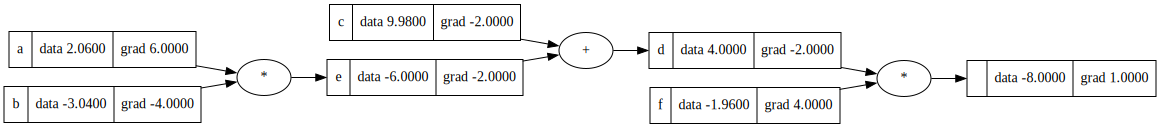

In [13]:
draw_dot(L)

In [9]:
L.grad = 1      #It's logical as dL / L = 1

In [10]:
#Staging area to review the derivative or gradient function
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10, label = 'c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L1 = L.data

    a = Value(2.0 + h, label = 'a')         #Add h to a
    b = Value(-3.0, label = 'b')
    c = Value(10, label = 'c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L2 = L.data

    print((L2 - L1) / h)            #Rise / run 

lol()

6.000000000000227


In [11]:
#Actual manual calculations or by using first principles for derivatives
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0
c.grad = -2.0
e.grad = -2.0
d.grad = -2.0
f.grad = 4.0

## Some notes

derivatives

(d / dc) (d) ....... === >>> 1.0

(dd / de)    .................. >> 1.0

d = c + e

(f(x+h) - f(x)) / h

=> ((c+h + e) - (c + e)) / h
(c + h 

## Plot some functions

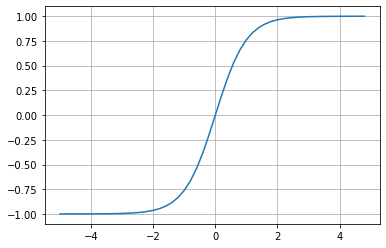

In [15]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()